In [25]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from PIL import Image
import sys
sys.path.append('../')

In [76]:
data_path = '../../data/model_input_images/test_SLDEM_compression_before2_coordinates_108_126_12_24/'
df = pd.read_csv(data_path+'craters_table.csv')
df.tail()

,Diameter (km),Lat,Long
239,13.414966,23.840338,116.792664
240,14.291867,23.963202,120.697786
241,11.142690,23.980065,109.399190
242,41.863286,23.988137,119.757160
243,10.481782,23.994520,118.218841


In [28]:
import numpy as np
ppm = 118 #m/pix
Rmoon = 1.737e6
mpd = np.pi*Rmoon/180 #m/deg
res = mpd/ppm #pix/deg
print(res)
print(3072/res)

256.91838226391104
11.957104715241387


Number of unique values: 238


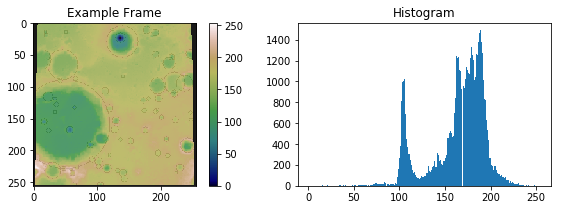

In [85]:
# 120 m/pix, 8 bit:
data_path = '../../data/model_input_images/test_coordinates_108_126_12_24/'
# 60 m/pix, 8 bit tile:
data_path = '../../data/model_input_images/test_SLDEM_compression_before2_coordinates_108_126_12_24/'
# 60 m/pix, 8 bit frame:
data_path = '../../data/model_input_images/test_SLDEM_compression_after_coordinates_108_126_12_24/'


# show one example frmae: 
# set = 'ws_2000_ol_400'
set = 'ws_4000_ol_800'
fn = data_path + set + '/train'
example = h5py.File(fn + '_images.hdf5', 'r')
im_num=1

fig = plt.figure(figsize=[10, 3])
plt.subplot(1,2,1)
plt.title('Example Frame')
plt.imshow(example['input_images'][im_num], aspect="equal", cmap="gist_earth")
plt.colorbar()
plt.imshow(1-example['target_masks'][im_num], aspect="equal", cmap="gray", alpha=0.1)
plt.subplot(1,2,2)
img_arr = np.concatenate(example['input_images'][im_num])
plt.hist(img_arr[img_arr>0], 256);
plt.title('Histogram')
print('Number of unique values: {}'.format(len(np.unique(img_arr))))

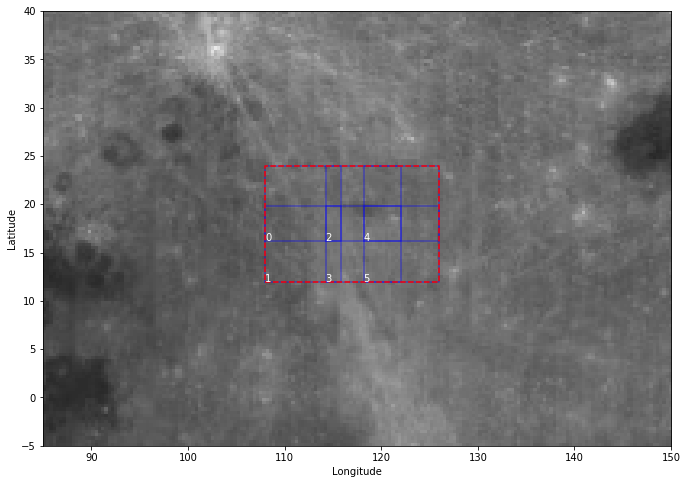

In [86]:
# See all frames of the set in global context: 
albedo = Image.open('../../data/maps/Clementine_albedo_simp750.jpg')
subset_list = np.arange(len(example['input_images'][:]))
fig = plt.figure(figsize=[16, 8])
dem_map = plt.imshow(albedo, extent=[-180,180,-90,90], aspect="equal", cmap="gray")
plt.xlim([85,150]); plt.ylim([-5,40])
plt.xlabel("Longitude"); plt.ylabel("Latitude")
for i in subset_list:
  llon,rlon,llat,ulat=example['longlat_bounds']['img_{:05d}'.format(i)][...]
  h1,=plt.plot([llon, llon, rlon, rlon, llon],[llat, ulat, ulat, llat, llat],'b',alpha=0.4)
  plt.text(llon,llat,str(i), color='w')
plt.plot([108, 126, 126, 108, 108],[12, 12, 24, 24, 12],'--r')

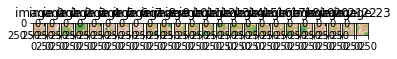

In [79]:
# from utils.maplot import plot_map_w_scalebar2
# figure
# %matplotlib notebook
for num in subset_list:
    ax=plt.subplot(1,len(subset_list),num+1)
#     plot_map_w_scalebar2(ax,example,num,colorbar=True);
    plt.imshow(example['input_images'][num], aspect="equal", cmap="gist_earth")
    plt.imshow(1-example['target_masks'][num], aspect="equal", cmap="gray", alpha=0.1)
    plt.title('image {}'.format(num));

In [44]:
source_image_path = "../../data/maps/LunarLROLrocKaguya_118mperpix.png"
Image.MAX_IMAGE_PIXELS = None
img = Image.open(source_image_path)
print(img.format, img.size, img.mode)

PNG (92160, 30720) L


In [66]:
[[3072, 600], [2000, 400], [1000, 200], [500, 100]]

[[3072, 600], [2000, 400], [1000, 200], [500, 100]]

[[6144, 1200], [4000, 800], [2000, 400], [1000, 200]]